In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn import preprocessing
from mlxtend.plotting import category_scatter
import seaborn as sns
import altair as alt

In [2]:
df_tax = pd.read_csv("2017_tax.csv",  header = None)

df_tax.columns = ["State", "Total Source Revenue ($ Million)", " Per Capita(S)", "Rank(S)", "Total Tax Collections ($ Million)", "Per Capita(T)", "Rank(T)"]
df_tax = df_tax.dropna().replace(',','.', regex=True)
df_tax

,State,Total Source Revenue ($ Million),Per Capita(S),Rank(S),Total Tax Collections ($ Million),Per Capita(T),Rank(T)
3,Alabama,29.039,5.957,41,16.429,3.370,51
4,Alaska,8.113,10.967,3,3.030,4.096,34
5,Arizona,35.337,5.013,51,24.472,3.472,49
6,Arkansas,17.479,5.820,44,12.017,4.002,36
7,California,353.127,8.963,9,243.082,6.170,10
8,Colorado,42.018,7.482,21,27.409,4.881,22
9,Connecticut,32.794,9.176,7,27.297,7.638,3
10,Delaware,7.640,7.983,16,4.676,4.886,21
11,District of Columbia,9.017,12.961,1,7.456,10.717,1
12,Florida,124.219,5.922,42,76.620,3.653,46


Text(0.5, 1.0, 'State Tax Revenue vs Tax Per Capita')

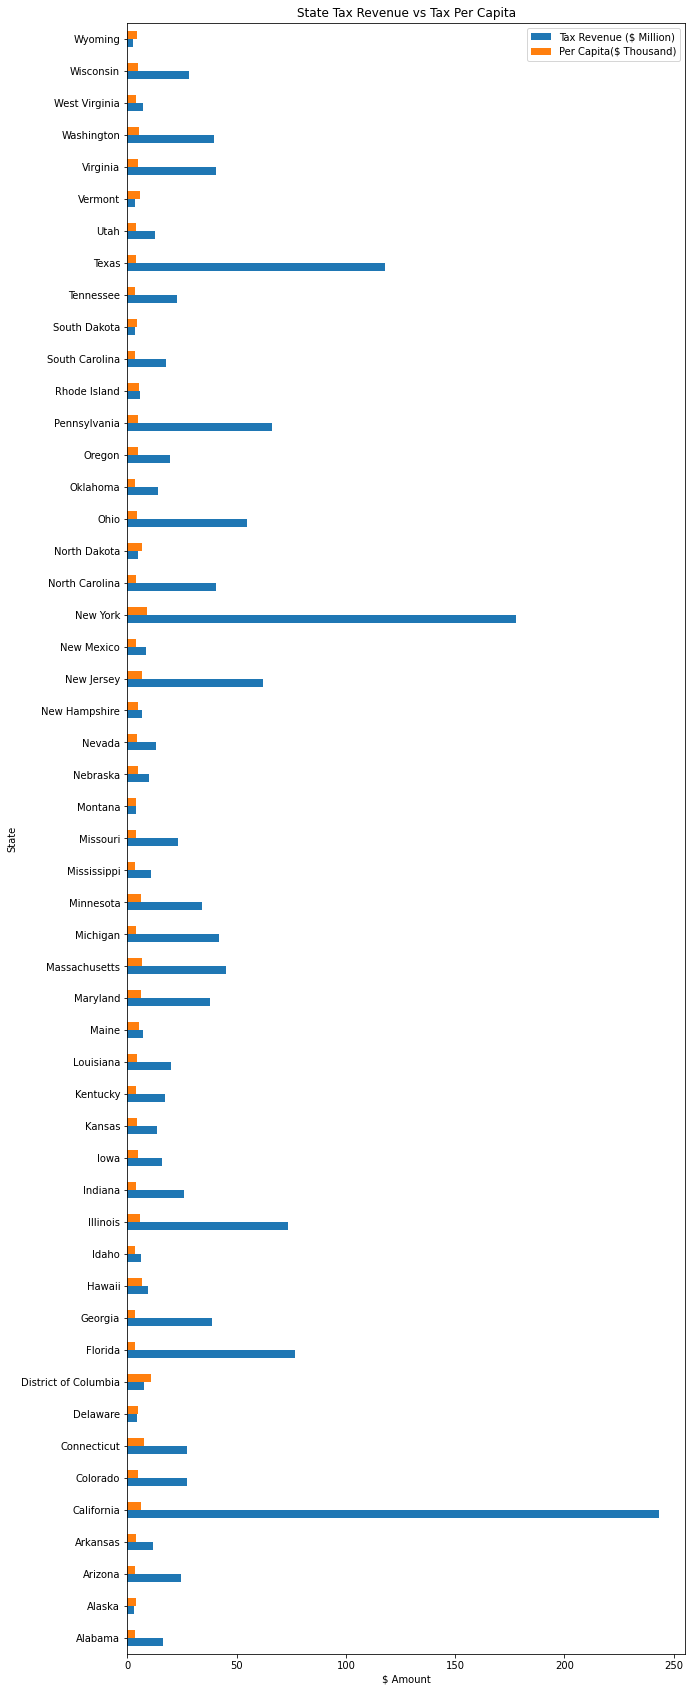

In [3]:
tax_state = df_tax[["State","Total Tax Collections ($ Million)", "Per Capita(T)"]]
tax_state.columns = ["State", "Tax Revenue ($ Million)", "Per Capita($ Thousand)"]

tax = tax_state.set_index("State").astype(float)



ax =tax.plot.barh(figsize = (10,30))
ax.set_xlabel("$ Amount")
ax.set_title("State Tax Revenue vs Tax Per Capita")


In [5]:
print(tax.describe())
print('')
print(tax.mean())
print('')
print(tax.median())
print('')
print(tax.max()-tax.min())

       Tax Revenue ($ Million)  Per Capita($ Thousand)
count                51.000000               51.000000
mean                 32.340176                4.951412
std                  43.521986                1.463632
min                   2.720000                3.370000
25%                   8.037500                3.924000
50%                  17.685000                4.682000
75%                  39.301500                5.452000
max                 243.082000               10.717000

Tax Revenue ($ Million)    32.340176
Per Capita($ Thousand)      4.951412
dtype: float64

Tax Revenue ($ Million)    17.685
Per Capita($ Thousand)      4.682
dtype: float64

Tax Revenue ($ Million)    240.362
Per Capita($ Thousand)       7.347
dtype: float64


In [6]:
rev = tax["Tax Revenue ($ Million)"].sort_values(ascending = False)
print(rev.head(10))
print(rev.tail(10))

State
California       243.082
New York         177.751
Texas            117.852
Florida           76.620
Illinois          73.702
Pennsylvania      66.070
New Jersey        62.027
Ohio              54.608
Massachusetts     45.053
Michigan          41.787
Name: Tax Revenue ($ Million), dtype: float64
State
New Hampshire    6.607
Idaho            6.380
Rhode Island     5.876
North Dakota     5.033
Delaware         4.676
Montana          4.084
Vermont          3.775
South Dakota     3.720
Alaska           3.030
Wyoming          2.720
Name: Tax Revenue ($ Million), dtype: float64


In [7]:
sal = pd.read_csv("avg_sal.csv")

sal = sal[["Unnamed: 0","2017-18.1"]]
sal = sal.rename(columns = {'Unnamed: 0': 'State', '2017-18.1': 'Avg_Salary ($ Thousands)'})
sal = sal.drop([0]).set_index("State")
sal = sal["Avg_Salary ($ Thousands)"].str.replace(",",".").astype(float).to_frame()
sal = sal['Avg_Salary ($ Thousands)'].sort_values(ascending = False)
sal = sal.reset_index()
sal

,State,Avg_Salary ($ Thousands)
0,New York,83.585
1,California,81.126
2,Massachusetts,79.710
3,District of Columbia,76.486
4,Connecticut,73.113
5,New Jersey,69.917
6,Maryland,69.761
7,Alaska,69.474
8,Pennsylvania,67.398
9,Rhode Island,66.758


In [8]:
#DESCRIPTIVE ANALYSIS 
print("Highest 5 AVG SAL States")
print(sal.head(5))
print("")

print("Lowest 5 AVG SAL States")
print(sal.tail(5))
print("")

print(sal['Avg_Salary ($ Thousands)'].describe(include = 'all'))
print("")
#Average Teacher Salary in $ Thousands:
print(sal['Avg_Salary ($ Thousands)'].mean())

#Median Teacher Salary in $ Thousands:
print(sal['Avg_Salary ($ Thousands)'].median())
#Mode Teacher Salary in $ Thousands:
#print(sal['Avg Sal'].mode())
#Range Teacher Salary in $ Thousands:
print(sal['Avg_Salary ($ Thousands)'].max() - sal['Avg_Salary ($ Thousands)'].min())



Highest 5 AVG SAL States
                  State  Avg_Salary ($ Thousands)
0              New York                    83.585
1            California                    81.126
2         Massachusetts                    79.710
3  District of Columbia                    76.486
4           Connecticut                    73.113

Lowest 5 AVG SAL States
            State  Avg_Salary ($ Thousands)
46        Florida                    47.721
47           Utah                    47.604
48       Oklahoma                    45.678
49  West Virginia                    45.642
50    Mississippi                    43.107

count    51.000000
mean     57.282137
std       9.760218
min      43.107000
25%      50.329500
50%      54.846000
75%      61.593000
max      83.585000
Name: Avg_Salary ($ Thousands), dtype: float64

57.282137254901954
54.846
40.477999999999994


In [75]:
bins = pd.cut(sal["Avg_Salary ($ Thousands)"], bins = [40,55,70,85]).value_counts()
bins = bins.to_frame().reset_index()
bins = bins.rename(columns = {"index" : "Salary Range ($ Thousands)", "Avg_Salary ($ Thousands)": "Number of States Count"})
bins


,Salary Range ($ Thousands),Number of States Count
0,"(40, 55]",26
1,"(55, 70]",20
2,"(70, 85]",5


Text(0.5, 1.0, 'Salary Range Grouped by State Count')

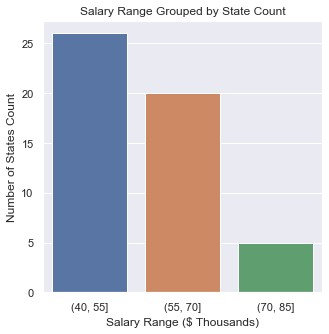

In [74]:
sns.set(rc={'figure.figsize':(5,5)})


ax = sns.barplot(y =  "Number of States Count",x ="Salary Range ($ Thousands)", data = bins)
ax.set_title("Salary Range Grouped by State Count")

In [84]:
bar = alt.Chart(sal).mark_bar().encode(
    y = alt.Y("State", sort = "-x"), 
    x = alt.X("Avg_Salary ($ Thousands)"),
    color= alt.condition(
        alt.datum.State == "New York",
        alt.value('orange'),
        alt.value('steelblue')
    )
)

text = bar.mark_text(
        align='left',
        baseline='middle',
      
    ).encode(
        text='Avg_Salary ($ Thousands):Q'
    )

(bar+text).properties(width = 500)

alt.LayerChart(...)

Text(0.5, 0, 'Average Salary ($ Thosands)')

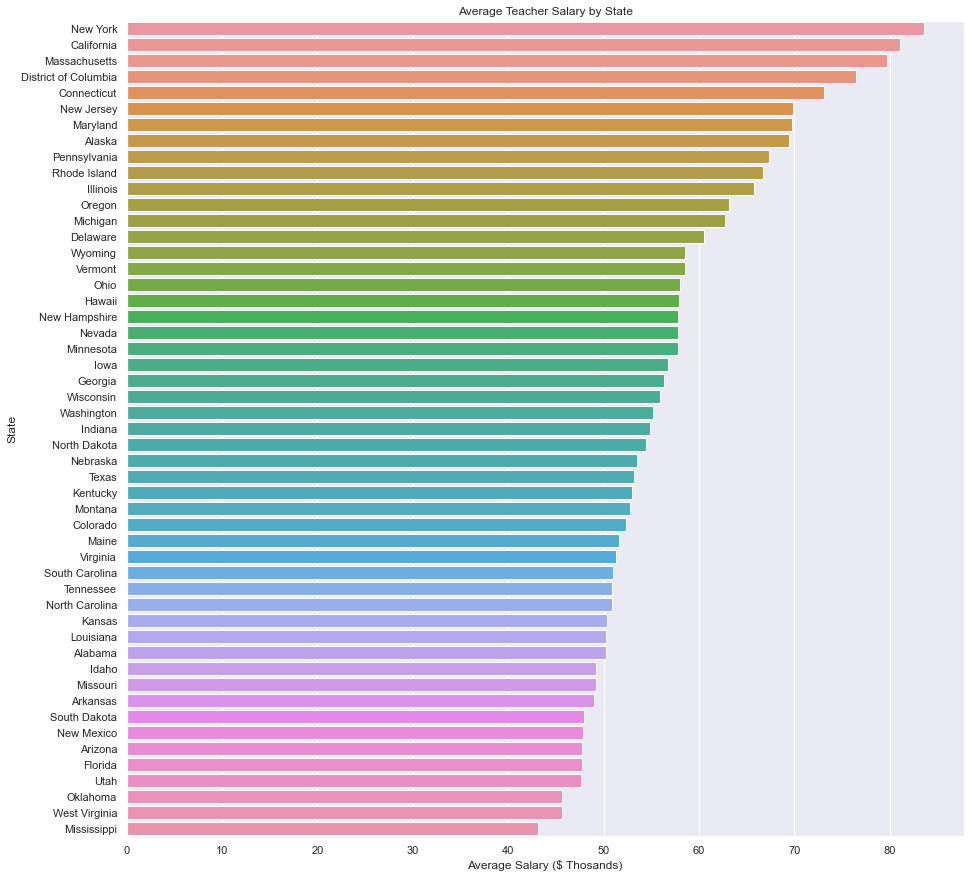

In [49]:
sns.set(rc={'figure.figsize':(15,15)})

ax = sns.barplot(data = sal, y = "State", x="Avg_Salary ($ Thousands)")

ax.set_title("Average Teacher Salary by State");
ax.set_xlabel("Average Salary ($ Thosands)")

In [103]:

df_new = pd.merge(sal, tax, on='State', how='inner')
df_new = df_new.drop(columns =["Per Capita($ Thousand)"])
#df_new = df_new.set_index("State")

df_new=df_new.sort_values("Tax Revenue ($ Million)", ascending = False)

df_new


,State,Avg_Salary ($ Thousands),Tax Revenue ($ Million)
1,California,81.126,243.082
0,New York,83.585,177.751
28,Texas,53.167,117.852
46,Florida,47.721,76.620
10,Illinois,65.776,73.702
8,Pennsylvania,67.398,66.070
5,New Jersey,69.917,62.027
16,Ohio,58.000,54.608
2,Massachusetts,79.710,45.053
12,Michigan,62.702,41.787


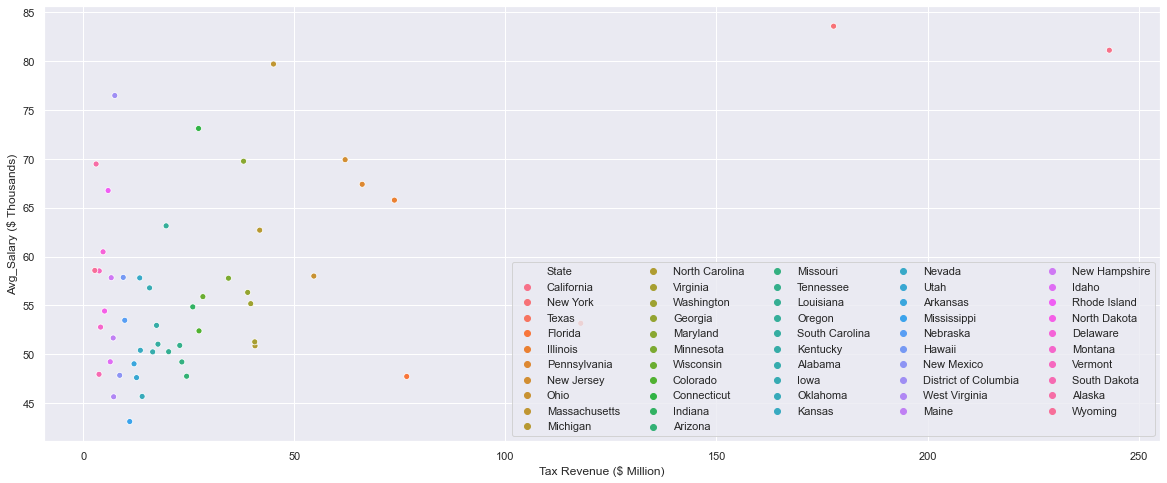

In [104]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.scatterplot(x="Tax Revenue ($ Million)", y="Avg_Salary ($ Thousands)", hue = 'State', data=df_new)
ax.legend(frameon=None, loc='lower right', ncol=5)

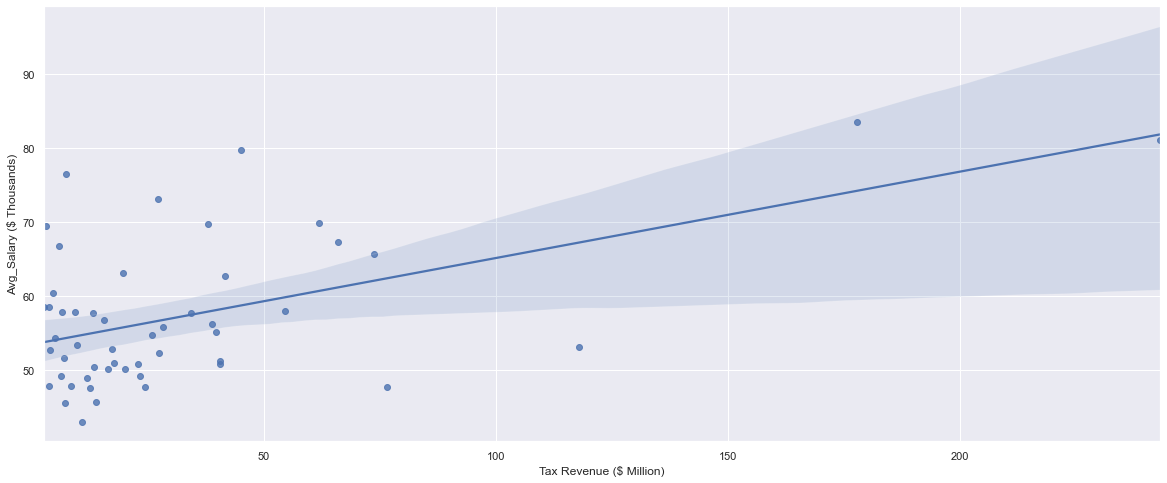

In [105]:
sns.set(rc={'figure.figsize':(20,8)})


ax = sns.regplot(x="Tax Revenue ($ Million)", y="Avg_Salary ($ Thousands)", data=df_new)



In [123]:
trev = rev.head(10)
tsal = sal.head(10)

df_news = pd.merge(tsal, trev, on='State', how='inner')
#df_news = df_news.drop(columns =["Per Capita($ Thousand)"])
#df_new = df_new.set_index("State")

df_news=df_news.sort_values("Tax Revenue ($ Million)", ascending = False)

df_news.set_index("State")




,Avg_Salary ($ Thousands),Tax Revenue ($ Million)
State,,
California,81.126,243.082
New York,83.585,177.751
Pennsylvania,67.398,66.070
New Jersey,69.917,62.027
Massachusetts,79.710,45.053
